# Kaggle first competition: Titanic

Goal: Predict if a passenger has survived or not.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

Taking a look at the data. It is already split into train and test datasets.

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# humm... there are missing data. How many are there actually?
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.shape

(891, 12)

In [6]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [7]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Well, I am going to assume some things:
- 'PassengerID' does not affect the outcoming (if the person survived or not);
- 'Name' could affect the outcoming if it was an "important" (rich) person. However, this is already indirectly included in the 'Pclass' feature! Thus, I can discard this column;
- 'Ticket' is equivalent to 'PassengerID'. Thus, I could discard it as well.

In [9]:
train = train.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


There is a point in here:

<b>'Cabin'</b> is related to the person's status and the spatial position. If it was just the first, I could just discard it because <b>'Pclass'</b> would already give me the information that I needed. The problem is the second: someone who was at the top of the ship could have had more time to run than someone from the botton.<br><br>
So what I'm going to do is acutally simple: based on Titanic cabin disposal that I found on the internet, I'm going to create a new feature called <b>'CabinPosition'</b> which will receive three categories: <mark>'1'</mark> for cabins that were at the top of the ship (A, B, C); <mark>'2'</mark> for cabins that were at the middle of the ship (D,E); <mark>'3'</mark> for cabins that were at the bottom of the ship (F, G, T). This, however, is a little subversive.

In [11]:
cabin_position = np.array([])

In [12]:
for cabin in train['Cabin']:
    if type(cabin) == str:
        # it is a text of the type 'A123'. I only want the letter.
        if cabin[0] == 'A' or cabin[0] == 'B' or cabin[0] == 'C':
            cabin_position = np.append(cabin_position, 1)
        elif cabin[0] == 'D' or cabin[0] == 'E':
            cabin_position = np.append(cabin_position, 2)
        else:
            cabin_position = np.append(cabin_position, 3)
    else:
        # it is a missing data.
        cabin_position = np.append(cabin_position, np.nan)

In [13]:
np.unique(cabin_position)

array([ 1.,  2.,  3., nan])

In [14]:
# Droping the column 'Cabin' and including cabin_position as a new feature
train = train.drop(['Cabin'], axis=1)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
train['CabinPosition'] = cabin_position

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,1.0
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,1.0
4,0,3,male,35.0,0,0,8.0500,S,NaN


Let's replace the categorical data of type 'str' to some categorical data of type 'int'.<br><br>
In 'Age': male --> 0 and female --> 1
In 'Embarked': C --> 0, Q --> 1 and S --> 2

In [18]:
train['Sex'].replace(['male', 'female'], [0,1], inplace=True)

In [19]:
train['Embarked'].replace(['C', 'Q', 'S'], [0,1,2], inplace=True)

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,22.0,1,0,7.2500,2.0,NaN
1,1,1,1,38.0,1,0,71.2833,0.0,1.0
2,1,3,1,26.0,0,0,7.9250,2.0,NaN
3,1,1,1,35.0,1,0,53.1000,2.0,1.0
4,0,3,0,35.0,0,0,8.0500,2.0,NaN


There are still a lot of missing data!<br><br>
The idea now to solve this problem is: I will use a cluster algorithm to group similar instances. From these, the missing data will be replaced by the most common feature value in each cluster.

In [21]:
train.isna().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
CabinPosition    687
dtype: int64

I don't know if this will be a mistake, but I'm going to replace the two missing data from the Embarked feature with the categorical value closest to the median of the entire train set.

In [22]:
train['Embarked'].replace([np.nan], round(train['Embarked'].median()), inplace=True)

In [23]:
train.isna().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           0
CabinPosition    687
dtype: int64

Now I will apply the standard scaler in the feature 'Fare'. I won't apply it on 'SibSp' and 'Parch' because they represent the number of siblings/spouses and the number of parents/children aboard the Titanic, respetively. Their values won't be much distant from the interval [-3, +3]

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,22.0,1,0,7.2500,2.0,NaN
1,1,1,1,38.0,1,0,71.2833,0.0,1.0
2,1,3,1,26.0,0,0,7.9250,2.0,NaN
3,1,1,1,35.0,1,0,53.1000,2.0,1.0
4,0,3,0,35.0,0,0,8.0500,2.0,NaN


In [25]:
std_scaler = StandardScaler()
std_scaler.fit(pd.DataFrame(train['Fare'], columns=['Fare']))
train['Fare'] = std_scaler.transform(pd.DataFrame(train['Fare'], columns=['Fare']))

In [26]:
std_scaler.mean_

array([32.20420797])

In [27]:
std_scaler.scale_

array([49.66553444])

In [28]:
np.sqrt(std_scaler.var_)

array([49.66553444])

In [29]:
std_scaler.var_

array([2466.66531169])

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,22.0,1,0,-0.502445,2.0,NaN
1,1,1,1,38.0,1,0,0.786845,0.0,1.0
2,1,3,1,26.0,0,0,-0.488854,2.0,NaN
3,1,1,1,35.0,1,0,0.420730,2.0,1.0
4,0,3,0,35.0,0,0,-0.486337,2.0,NaN


In [31]:
auxiliar_train = train.drop(['Survived', 'Age', 'CabinPosition'], axis=1)

In [32]:
auxiliar_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,-0.502445,2.0
1,1,1,1,0,0.786845,0.0
2,3,1,0,0,-0.488854,2.0
3,1,1,1,0,0.420730,2.0
4,3,0,0,0,-0.486337,2.0


In [33]:
kmeans_internal_distance = np.array([])
n = 15

In [34]:
# using KMeans
for num_clusters in range(1,n):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(auxiliar_train)
    kmeans_internal_distance = np.append(kmeans_internal_distance, kmeans.inertia_)

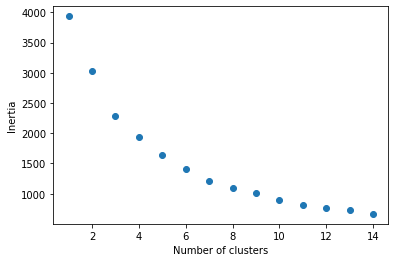

In [35]:
# Let's check the internal distances as a function of the number of clusters.
fig = plt.figure()
plt.scatter(range(1,n), kmeans_internal_distance)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

I guess n_clusters = 5 is good enough. This is, afterall, quite subjective.

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(auxiliar_train)

KMeans(n_clusters=5)

In [37]:
kmeans.labels_

array([1, 4, 1, 4, 1, 1, 4, 0, 3, 4, 3, 4, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 4, 0, 3, 1, 2, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 0, 1, 4, 1, 4, 4, 1, 1, 3, 0, 1, 4, 4, 0, 4, 3,
       1, 1, 0, 1, 1, 0, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 0, 3, 1,
       2, 1, 1, 1, 4, 3, 1, 1, 4, 4, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 2, 0, 4, 1, 4, 1, 4, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 4, 3, 4, 1, 4, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 4, 1, 3,
       1, 4, 1, 1, 1, 0, 1, 1, 1, 1, 0, 3, 4, 3, 4, 1, 4, 0, 3, 1, 4, 3,
       0, 4, 1, 1, 0, 4, 0, 3, 3, 4, 1, 4, 3, 1, 1, 1, 1, 3, 4, 4, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 4, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 3, 4, 1, 1, 3, 4, 1, 3, 3, 4, 4, 2, 3, 1, 0, 4, 4,
       1, 1, 0, 1, 4, 4, 4, 1, 3, 4, 1, 4, 1, 1, 0, 3, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 2, 4, 2, 1,

In [38]:
# With five clusters, I'm going to create five arrays to store the instance row number in each case.
cluster_0 = np.array([], dtype=int)
cluster_1 = np.array([], dtype=int)
cluster_2 = np.array([], dtype=int)
cluster_3 = np.array([], dtype=int)
cluster_4 = np.array([],dtype=int)

In [39]:
for indx, cluster_label in enumerate(kmeans.labels_):
    if cluster_label == 0:
        cluster_0 = np.append(cluster_0, indx)
    elif cluster_label == 1:
        cluster_1 = np.append(cluster_1, indx)
    elif cluster_label == 2:
        cluster_2 = np.append(cluster_2, indx)
    elif cluster_label == 3:
        cluster_3 = np.append(cluster_3, indx)
    else:
        cluster_4 = np.append(cluster_4, indx)

First of all, I will replace the 'Age'. The idea is to get the average and the standard deviation from the instances in each cluster and use it to replace the missing data with random samples from a Normal distribution.

In [40]:
cluster_0_train_data = train.iloc[cluster_0,:]
cluster_1_train_data = train.iloc[cluster_1,:]
cluster_2_train_data = train.iloc[cluster_2,:]
cluster_3_train_data = train.iloc[cluster_3,:]
cluster_4_train_data = train.iloc[cluster_4,:]

In [41]:
train.isna().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           0
CabinPosition    687
dtype: int64

In [42]:
train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,22.0,1,0,-0.502445,2.0,NaN
1,1,1,1,38.0,1,0,0.786845,0.0,1.0
2,1,3,1,26.0,0,0,-0.488854,2.0,NaN
3,1,1,1,35.0,1,0,0.420730,2.0,1.0
4,0,3,0,35.0,0,0,-0.486337,2.0,NaN
5,0,3,0,NaN,0,0,-0.478116,1.0,NaN


In [43]:
# Replacing np.nan for a random.gauss(average, standard Deviation)
for row in cluster_0[train.iloc[cluster_0,3].isna() == True]:
    train.iloc[row,3] = random.gauss(cluster_0_train_data['Age'].mean(), cluster_0_train_data['Age'].std())

In [44]:
for row in cluster_1[train.iloc[cluster_1,3].isna() == True]:
    train.iloc[row,3] = random.gauss(cluster_1_train_data['Age'].mean(), cluster_1_train_data['Age'].std())

In [45]:
for row in cluster_2[train.iloc[cluster_2,3].isna() == True]:
    train.iloc[row,3] = random.gauss(cluster_2_train_data['Age'].mean(), cluster_2_train_data['Age'].std())

In [46]:
for row in cluster_3[train.iloc[cluster_3,3].isna() == True]:
    train.iloc[row,3] = random.gauss(cluster_3_train_data['Age'].mean(), cluster_3_train_data['Age'].std())

In [47]:
for row in cluster_4[train.iloc[cluster_4,3].isna() == True]:
    train.iloc[row,3] = random.gauss(cluster_4_train_data['Age'].mean(), cluster_4_train_data['Age'].std())

In [48]:
train.isna().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
CabinPosition    687
dtype: int64

Now that I solved the problem with the missing data in the 'Age' feature, now I'm going to solve the problem with the 'CabinPosition'. This time, the missing data will be replaced with the most common ocurrence in the cluster.

In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,22.0,1,0,-0.502445,2.0,NaN
1,1,1,1,38.0,1,0,0.786845,0.0,1.0
2,1,3,1,26.0,0,0,-0.488854,2.0,NaN
3,1,1,1,35.0,1,0,0.420730,2.0,1.0
4,0,3,0,35.0,0,0,-0.486337,2.0,NaN


In [50]:
std_scaler_age = StandardScaler()
std_scaler_age.fit(pd.DataFrame(train['Age'], columns=['Age']))
train['Age'] = std_scaler_age.transform(pd.DataFrame(train['Age'], columns=['Age']))

In [51]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,-0.541426,1,0,-0.502445,2.0,NaN
1,1,1,1,0.566124,1,0,0.786845,0.0,1.0
2,1,3,1,-0.264539,0,0,-0.488854,2.0,NaN
3,1,1,1,0.358458,1,0,0.420730,2.0,1.0
4,0,3,0,0.358458,0,0,-0.486337,2.0,NaN


Remember: 
- <mark>'1'</mark> --> (A, B, C) / 'top'
- <mark>'2'</mark> --> (D,E) / 'middle'
- <mark>'3'</mark> --> (F, G, T) / 'down'

In [52]:
# Replacing np.nan for the most common ocurrence in the cluster

clusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]
cabin_cluster_value = []

for cluster in clusters:

    top_counting = 0
    middle_counting = 0
    down_counting = 0

    for row in cluster[train.iloc[cluster,8].isna() == False]:
        # Find the most common ocurrence
        if int(train.iloc[row,8]) == 1:
            top_counting += 1
        elif int(train.iloc[row,8]) == 2:
            middle_counting += 1
        else:
            down_counting += 1

    # Replace the missing values
    for row in cluster[train.iloc[cluster,8].isna() == True]:
        # armax return the index of the highest value in an array. Since the categorical values are 1, 2 and 3, 
        # it is possible to use this function with a well chosen list.
        train.iloc[row,8] = np.argmax([top_counting, middle_counting, down_counting]) + 1
    
    cabin_cluster_value.append(np.argmax([top_counting, middle_counting, down_counting]) + 1)

In [53]:
train.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinPosition    0
dtype: int64

In [54]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,0,3,0,-0.541426,1,0,-0.502445,2.0,2.0
1,1,1,1,0.566124,1,0,0.786845,0.0,1.0
2,1,3,1,-0.264539,0,0,-0.488854,2.0,2.0
3,1,1,1,0.358458,1,0,0.420730,2.0,1.0
4,0,3,0,0.358458,0,0,-0.486337,2.0,2.0


## Ok, I guess now I can build some models to train and validate the classification.

I'll start with Support Vector Machine. Since this model is based on hiperplanes to separate the data, I bet it will have a good response to this classification.

In [55]:
from sklearn.svm import SVC

from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [56]:
y_true = np.array([])
y_predicted = np.array([])

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    svc = SVC(gamma='auto', kernel='rbf', random_state=None)
    svc.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        y_predicted = np.append(y_predicted, svc.predict([features]))

print('Support Vector Machine')
print('Accuracy: ', accuracy_score(y_true, y_predicted))
print('F1 score: ',f1_score(y_true, y_predicted, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted))    

Support Vector Machine
Accuracy:  0.8215488215488216
F1 score:  0.8215488215488216
Precision score:  0.8215488215488216
Recall score:  0.8215488215488216
Confusion Matrix
[[487  62]
 [ 97 245]]


This was... better than I was expecting. There must be something off somewhere.

This time, I'm going to use a Random Forest.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
y_true = np.array([])
y_predicted = np.array([])

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    random_forest = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=None)
    random_forest.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        y_predicted = np.append(y_predicted, random_forest.predict([features]))

print('Random Forest')
print('Accuracy: ', accuracy_score(y_true, y_predicted))
print('F1 score: ',f1_score(y_true, y_predicted, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted))

Random Forest
Accuracy:  0.7856341189674523
F1 score:  0.7856341189674523
Precision score:  0.7856341189674523
Recall score:  0.7856341189674523
Confusion Matrix
[[517  32]
 [159 183]]


Now I'm going to use Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
y_true = np.array([])
y_predicted = np.array([])

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    log_reg = LogisticRegression(penalty='l2', C=0.1)
    log_reg.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        y_predicted = np.append(y_predicted, log_reg.predict([features]))

print('Logistic Regression')
print('Accuracy: ', accuracy_score(y_true, y_predicted))
print('F1 score: ',f1_score(y_true, y_predicted, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted))

Logistic Regression
Accuracy:  0.7968574635241302
F1 score:  0.7968574635241302
Precision score:  0.7968574635241302
Recall score:  0.7968574635241302
Confusion Matrix
[[484  65]
 [116 226]]


AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
y_true = np.array([])
y_predicted = np.array([])

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    ada = AdaBoostClassifier(n_estimators=100, random_state=None)
    ada.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        y_predicted = np.append(y_predicted, ada.predict([features]))

print('AdaBoost')
print('Accuracy: ', accuracy_score(y_true, y_predicted))
print('F1 score: ',f1_score(y_true, y_predicted, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted))

AdaBoost
Accuracy:  0.7946127946127947
F1 score:  0.7946127946127947
Precision score:  0.7946127946127947
Recall score:  0.7946127946127947
Confusion Matrix
[[460  89]
 [ 94 248]]


Well, why not to try KNN?

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
y_true = np.array([])
y_predicted = np.array([])

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean', algorithm='kd_tree')
    knn.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        y_predicted = np.append(y_predicted, knn.predict([features]))

print('K Nearest Neighbors')
print('Accuracy: ', accuracy_score(y_true, y_predicted))
print('F1 score: ',f1_score(y_true, y_predicted, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted))

K Nearest Neighbors
Accuracy:  0.755331088664422
F1 score:  0.7553310886644219
Precision score:  0.755331088664422
Recall score:  0.755331088664422
Confusion Matrix
[[502  47]
 [171 171]]


In [65]:
int(knn.predict([features])[0])

0

Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [67]:
y_true = np.array([])
y_predicted_g = np.array([])
y_predicted_b = np.array([])

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    gnb = GaussianNB()
    bnb = BernoulliNB()
    
    gnb.fit(X_train, y_train)
    bnb.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        y_predicted_g = np.append(y_predicted_g, gnb.predict([features]))
        y_predicted_b = np.append(y_predicted_b, bnb.predict([features]))

print('Gaussian Naive Bayes')
print('Accuracy: ', accuracy_score(y_true, y_predicted_g))
print('F1 score: ',f1_score(y_true, y_predicted_g, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted_g, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted_g, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted_g))
print(30*'-')
print('Bernoulli Naive Bayes')
print('Accuracy: ', accuracy_score(y_true, y_predicted_b))
print('F1 score: ',f1_score(y_true, y_predicted_b, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted_b, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted_b, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted_b))

Gaussian Naive Bayes
Accuracy:  0.7867564534231201
F1 score:  0.78675645342312
Precision score:  0.7867564534231201
Recall score:  0.7867564534231201
Confusion Matrix
[[451  98]
 [ 92 250]]
------------------------------
Bernoulli Naive Bayes
Accuracy:  0.77665544332211
F1 score:  0.77665544332211
Precision score:  0.77665544332211
Recall score:  0.77665544332211
Confusion Matrix
[[447 102]
 [ 97 245]]


Lastly, I will try using all the models as an unique ensemble.

The voting system will be: each model will have a unique weight that, after an input, will be used to count the vote's weight. For each output class, the models weights that have chosen that class as the output will be sum and, after that, the result will be compared with the weight of the other class. The one with the higher weight will be the ensemble output.

In [68]:
# weights = [KNN, GaussianNB, BernoulliNB, Random Forest, ADA, Logistic Regression, SVM]
weights = [0.8, 0.8, 0.8, 1, 1.5, 2 ,2.5]

In [69]:
y_true = np.array([])
y_predicted = np.array([])
models = []

kfold = KFold(n_splits=5, shuffle=True)

for train_index, validation_index in kfold.split(train):
    # Start separating the target from the features
    X_train, X_validation = train.values[train_index], train.values[validation_index]
    
    y_train = X_train[:, 0]
    X_train = X_train[:, 1:]
    y_validation = X_validation[:,0]
    X_validation = X_validation[:,1:]
    
    models = []
    
    models.append(KNeighborsClassifier(n_neighbors=2, metric='euclidean', algorithm='kd_tree'))
    #knn.fit(X_train, y_train)
    models.append(GaussianNB())
    #gnb.fit(X_train, y_train)
    models.append(BernoulliNB())    
    #bnb.fit(X_train, y_train)
    models.append(RandomForestClassifier(n_estimators=100,max_depth=2, random_state=None))
    #random_forest.fit(X_train, y_train)
    models.append(AdaBoostClassifier(n_estimators=100, random_state=None))
    #ada.fit(X_train, y_train)
    models.append(LogisticRegression(penalty='l2', C=0.1))
    #log_reg.fit(X_train, y_train)
    models.append(SVC(gamma='auto', kernel='rbf', random_state=None))
    #svc.fit(X_train, y_train)

    
    for m in models:
        m.fit(X_train, y_train)
    
    for indx, features in enumerate(X_validation):
        y_true = np.append(y_true, y_validation[indx])
        
        weight_for_not_survived = 0 # survived = 0
        weight_for_survived = 0 # survived = 1
        
        for i, model in enumerate(models):
            prediction = int(model.predict([features])[0])
            if prediction == 1:
                weight_for_survived += weights[i]
            else:
                weight_for_not_survived += weights[i]
        
        if weight_for_survived > weight_for_not_survived:
            y_predicted = np.append(y_predicted, 1)
        else:
            y_predicted = np.append(y_predicted, 0)

print('Ensemble model')
print('Accuracy: ', accuracy_score(y_true, y_predicted))
print('F1 score: ',f1_score(y_true, y_predicted, average='micro'))
print('Precision score: ',precision_score(y_true, y_predicted, average='micro'))
print('Recall score: ', recall_score(y_true, y_predicted, average='micro'))
print('Confusion Matrix')
print(confusion_matrix(y_true, y_predicted))

Ensemble model
Accuracy:  0.8069584736251403
F1 score:  0.8069584736251403
Precision score:  0.8069584736251403
Recall score:  0.8069584736251403
Confusion Matrix
[[482  67]
 [105 237]]


Which components are the most important for the classification?

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [72]:
pd.DataFrame(pca.components_, columns=[train.iloc[:,1:].columns])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,-0.530568,0.040185,0.373809,-0.033270,0.021814,0.668496,-0.247611,-0.259553
1,0.033129,0.111777,-0.509594,0.702731,0.371443,0.299453,0.000545,-0.072452


## Well, let's just test the model.

In [73]:
test = pd.read_csv('test.csv')

In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [75]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Well, this is not what I was expecting. There is not the 'Survived' feature. I guess I was getting confused with the meaning of test set and validation set.<br><br>
Anyway, I'm going to preprocess it.

In [76]:
# I'm going to replace the missing data in 'Fare' with the average of people in the same 'Pclass'
test[test['Fare'].isna() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [77]:
p_class_index = np.array([])

In [78]:
for indx, p_class in enumerate(test['Pclass']):
    if p_class == test.iloc[152, 1]:
        p_class_index = np.append(p_class_index, indx)

In [79]:
test.iloc[p_class_index, :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
test.iloc[152,8] = test.iloc[p_class_index, 8].mean()

In [81]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [82]:
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [83]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [84]:
test['Sex'].replace(['male', 'female'], [0,1], inplace=True)

In [85]:
test['Embarked'].replace(['C', 'Q', 'S'], [0,1,2], inplace=True)

In [86]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,NaN,1
1,3,1,47.0,1,0,7.0000,NaN,2
2,2,0,62.0,0,0,9.6875,NaN,1
3,3,0,27.0,0,0,8.6625,NaN,2
4,3,1,22.0,1,1,12.2875,NaN,2


In [87]:
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [88]:
cabin_position = np.array([])

In [89]:
for cabin in test['Cabin']:
    if type(cabin) == str:
        # it is a text of the type 'A123'. I only want the letter.
        if cabin[0] == 'A' or cabin[0] == 'B' or cabin[0] == 'C':
            cabin_position = np.append(cabin_position, 1)
        elif cabin[0] == 'D' or cabin[0] == 'E':
            cabin_position = np.append(cabin_position, 2)
        else:
            cabin_position = np.append(cabin_position, 3)
    else:
        # it is a missing data.
        cabin_position = np.append(cabin_position, np.nan)

In [90]:
np.unique(cabin_position)

array([ 1.,  2.,  3., nan])

In [91]:
test = test.drop(['Cabin'], axis=1)

In [92]:
test['CabinPosition'] = cabin_position

In [93]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,3,0,34.5,0,0,7.8292,1,NaN
1,3,1,47.0,1,0,7.0000,2,NaN
2,2,0,62.0,0,0,9.6875,1,NaN
3,3,0,27.0,0,0,8.6625,2,NaN
4,3,1,22.0,1,1,12.2875,2,NaN


In [94]:
# I have to use the same scaler to the test set.
# Otherwise, it would mean that I know the test data before it arrives to be predicted.
test['Fare'] = std_scaler.transform(pd.DataFrame(test['Fare'], columns=['Fare']))

In [95]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,3,0,34.5,0,0,-0.490783,1,NaN
1,3,1,47.0,1,0,-0.507479,2,NaN
2,2,0,62.0,0,0,-0.453367,1,NaN
3,3,0,27.0,0,0,-0.474005,2,NaN
4,3,1,22.0,1,1,-0.401017,2,NaN


In [96]:
test.isna().sum()

Pclass             0
Sex                0
Age               86
SibSp              0
Parch              0
Fare               0
Embarked           0
CabinPosition    327
dtype: int64

In [97]:
auxiliar_test = test.drop(['Age', 'CabinPosition'], axis=1)

In [98]:
auxiliar_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,-0.490783,1
1,3,1,1,0,-0.507479,2
2,2,0,0,0,-0.453367,1
3,3,0,0,0,-0.474005,2
4,3,1,1,1,-0.401017,2


In [99]:
for indx, row in auxiliar_test[test['Age'].isna() == True].iterrows():
    if kmeans.predict([row])[0] == 0:
        test.iloc[indx,2] = random.gauss(cluster_0_train_data['Age'].mean(), cluster_0_train_data['Age'].std())
    elif kmeans.predict([row])[0] == 1:
        test.iloc[indx,2] = random.gauss(cluster_1_train_data['Age'].mean(), cluster_1_train_data['Age'].std())
    elif kmeans.predict([row])[0] == 2:
        test.iloc[indx,2] = random.gauss(cluster_2_train_data['Age'].mean(), cluster_2_train_data['Age'].std())
    elif kmeans.predict([row])[0] == 3:
        test.iloc[indx,2] = random.gauss(cluster_3_train_data['Age'].mean(), cluster_3_train_data['Age'].std())
    else:
        test.iloc[indx,2] = random.gauss(cluster_4_train_data['Age'].mean(), cluster_4_train_data['Age'].std())

In [100]:
test['Age'] = std_scaler_age.transform(pd.DataFrame(test['Age'], columns=['Age']))

In [101]:
test.isna().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
CabinPosition    327
dtype: int64

In [102]:
cabin_cluster_value

[1, 2, 1, 3, 1]

In [103]:
auxiliar_test[test['CabinPosition'].isna() == True]

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,0,0,-0.490783,1
1,3,1,1,0,-0.507479,2
2,2,0,0,0,-0.453367,1
3,3,0,0,0,-0.474005,2
4,3,1,1,1,-0.401017,2
...,...,...,...,...,...,...
412,3,1,0,0,-0.491874,2
413,3,0,0,0,-0.486337,2
415,3,0,0,0,-0.502445,2
416,3,0,0,0,-0.486337,2


In [104]:
for indx, row in auxiliar_test[test['CabinPosition'].isna() == True].iterrows():
    test.iloc[indx,7] = cabin_cluster_value[kmeans.predict([row])[0]]

In [105]:
test.isna().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
CabinPosition    0
dtype: int64

In [106]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinPosition
0,3,0,0.323847,0,0,-0.490783,1,2.0
1,3,1,1.189121,1,0,-0.507479,2,2.0
2,2,0,2.227450,0,0,-0.453367,1,2.0
3,3,0,-0.195317,0,0,-0.474005,2,2.0
4,3,1,-0.541426,1,1,-0.401017,2,3.0


In [107]:
y_test = np.array([], dtype=int)

for indx, features in enumerate(test.values):
       
    weight_for_not_survived = 0 # survived = 0
    weight_for_survived = 0 # survived = 1
        
    for i, model in enumerate(models):
        prediction = int(model.predict([features])[0])
        if prediction == 1:
            weight_for_survived += weights[i]
        else:
            weight_for_not_survived += weights[i]
        
    if weight_for_survived > weight_for_not_survived:
        y_test = np.append(y_test, 1)
    else:
        y_test = np.append(y_test, 0)

In [108]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
output = pd.read_csv('test.csv')

In [110]:
output.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
output = pd.DataFrame(output['PassengerId'], columns=['PassengerId'])

In [112]:
output.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [113]:
output['Survived'] = y_test

In [114]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [115]:
output.shape

(418, 2)

In [116]:
# Saving file
output.to_csv('output_validation.csv', index=False)

In [117]:
# Just to test something
y_test = np.array([], dtype=int)

for features in test.values:
    y_test = np.append(y_test, int(svc.predict([features])[0]))

In [118]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [119]:
output2 = pd.DataFrame(output['PassengerId'], columns=['PassengerId'])

In [120]:
output2['Survived'] = y_test

In [121]:
output2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [122]:
# Saving file
output2.to_csv('output_validation2.csv', index=False)